# **PYTHON + SQL**


The data set will be presented in the form of a RDBMS.

SQL queries will be used to extract the data.


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


In [1]:
import pandas as pd
import sqlite3 #SQLite3 to conect to the database file

In [2]:
#Download the database file

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-30 17:43:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  21.8MB/s    in 1.6s    

2024-06-30 17:43:25 (21.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [3]:
#Create connector and cursor objects

con = sqlite3.connect("m4_survey_data.sqlite")
cur = con.cursor()

In [5]:
#Execute SQL Queries with Python using cursor
cur.execute("select name from sqlite_master where type='table'") #Select all the tables in the database
print(cur.fetchall()) # Show the query results as a list

[('EduOther',), ('DevType',), ('LastInt',), ('JobFactors',), ('WorkPlan',), ('WorkChallenge',), ('LanguageWorkedWith',), ('LanguageDesireNextYear',), ('DatabaseWorkedWith',), ('DatabaseDesireNextYear',), ('PlatformWorkedWith',), ('PlatformDesireNextYear',), ('WebFrameWorkedWith',), ('WebFrameDesireNextYear',), ('MiscTechWorkedWith',), ('MiscTechDesireNextYear',), ('DevEnviron',), ('Containers',), ('SOVisitTo',), ('SONewContent',), ('Gender',), ('Sexuality',), ('Ethnicity',), ('master',)]


In [6]:
cur.execute("select * from LanguageWorkedWith")
print(cur.fetchall())


[(4, 'C'), (4, 'C++'), (4, 'C#'), (4, 'Python'), (4, 'SQL'), (9, 'Bash/Shell/PowerShell'), (9, 'C#'), (9, 'HTML/CSS'), (9, 'JavaScript'), (9, 'Python'), (9, 'Ruby'), (9, 'Rust'), (9, 'SQL'), (9, 'TypeScript'), (9, 'WebAssembly'), (9, 'Other(s):'), (13, 'Bash/Shell/PowerShell'), (13, 'HTML/CSS'), (13, 'JavaScript'), (13, 'PHP'), (13, 'SQL'), (13, 'TypeScript'), (16, 'Bash/Shell/PowerShell'), (16, 'C#'), (16, 'HTML/CSS'), (16, 'JavaScript'), (16, 'TypeScript'), (16, 'VBA'), (17, 'Bash/Shell/PowerShell'), (17, 'HTML/CSS'), (17, 'JavaScript'), (17, 'TypeScript'), (19, 'C#'), (19, 'HTML/CSS'), (19, 'Java'), (19, 'JavaScript'), (19, 'SQL'), (19, 'TypeScript'), (20, 'Bash/Shell/PowerShell'), (20, 'C#'), (20, 'HTML/CSS'), (20, 'Java'), (20, 'JavaScript'), (20, 'PHP'), (20, 'Python'), (20, 'R'), (20, 'SQL'), (22, 'Bash/Shell/PowerShell'), (22, 'C++'), (22, 'HTML/CSS'), (22, 'JavaScript'), (22, 'Python'), (22, 'Ruby'), (22, 'SQL'), (22, 'TypeScript'), (23, 'Bash/Shell/PowerShell'), (23, 'HTML/CS

In [7]:
#Using SQL Magic extensions - Makes it possible to write SQL queries directly into code cells as well as read the results straight into pandas DataFrames
%load_ext sql
%sql sqlite:///m4_survey_data.sqlite

In [8]:
#List all tables

%sql select name from sqlite_master where type='table'


 * sqlite:///m4_survey_data.sqlite
Done.


name
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear


In [9]:
#Query Containers table

%sql select * from Containers


Output hidden; open in https://colab.research.google.com to view.

In [10]:
#Get information from the table called master

%sql pragma table_info ('master')

 * sqlite:///m4_survey_data.sqlite
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,Respondent,INTEGER,0,None,0
2,MainBranch,TEXT,0,None,0
3,Hobbyist,TEXT,0,None,0
4,OpenSourcer,TEXT,0,None,0
5,OpenSource,TEXT,0,None,0
6,Employment,TEXT,0,None,0
7,Country,TEXT,0,None,0
8,Student,TEXT,0,None,0
9,EdLevel,TEXT,0,None,0


In [11]:
#Query using slq magic
%sql select Age, Country, EdLevel from master limit 5

 * sqlite:///m4_survey_data.sqlite
Done.


Age,Country,EdLevel
22.0,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
23.0,New Zealand,Some college/university study without earning a degree
28.0,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)"
26.0,United Kingdom,"Master’s degree (MA, MS, M.Eng., MBA, etc.)"
29.0,Australia,"Bachelor’s degree (BA, BS, B.Eng., etc.)"


In [12]:
#pd.read_sql - Create DataFrame with SQL query results

df_age=pd.read_sql('select Age, Country, EdLevel from master', con)
df_age.head()

,Age,Country,EdLevel
0,22.0,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
1,23.0,New Zealand,Some college/university study without earning ...
2,28.0,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)"
3,26.0,United Kingdom,"Master’s degree (MA, MS, M.Eng., MBA, etc.)"
4,29.0,Australia,"Bachelor’s degree (BA, BS, B.Eng., etc.)"


In [17]:
#List top 5 Age with more respondents

%%sql select Age, count(*) as quantity from master
group by age
order by quantity desc
limit 5

 * sqlite:///m4_survey_data.sqlite
Done.


Age,quantity
28.0,787
25.0,738
27.0,724
26.0,720
29.0,697


In [18]:
#Another possibility

df_age=pd.read_sql('select Age, count(*) as quantity from master group by age order by quantity desc limit 5', con)
df_age.head()

,Age,quantity
0,28.0,787
1,25.0,738
2,27.0,724
3,26.0,720
4,29.0,697


List all databased worked with by each respondent

In [ ]:
%sql select * from databaseworkedwith limit 5

 * sqlite:///m4_survey_data.sqlite
Done.


Respondent,DatabaseWorkedWith
4,MySQL
4,SQLite
9,DynamoDB
9,PostgreSQL
9,SQLite


In [ ]:
%sql select respondent, group_concat(databaseworkedwith) from databaseworkedwith group by respondent limit 5

 * sqlite:///m4_survey_data.sqlite
Done.


Respondent,group_concat(databaseworkedwith)
4,"MySQL,SQLite"
9,"DynamoDB,PostgreSQL,SQLite"
13,"Couchbase,DynamoDB,Firebase,MySQL"
16,"MongoDB,Microsoft SQL Server,MySQL"
17,"MongoDB,PostgreSQL"


In [22]:
#Query respondents that have worked with MySQL

%%sql select * from (select respondent, group_concat(databaseworkedwith) as database from databaseworkedwith
group by respondent
having database LIKE '%MySQL%')


 * sqlite:///m4_survey_data.sqlite
Done.


respondent,database
4,"MySQL,SQLite"
13,"Couchbase,DynamoDB,Firebase,MySQL"
16,"MongoDB,Microsoft SQL Server,MySQL"
19,"DynamoDB,Firebase,Microsoft SQL Server,MySQL,SQLite"
22,"Elasticsearch,MySQL,Oracle,Redis"
24,"Firebase,MongoDB,MySQL"
25,MySQL
26,"Microsoft SQL Server,MySQL,Redis,SQLite"
29,"Firebase,MongoDB,MySQL"
43,"Firebase,MySQL,Oracle,SQLite"


## Visualizing of database information


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Histogram of ConvertedComp


In [24]:
#Create DataFrame using 'master' table

df=pd.read_sql('select * from master', con)
df.head()



,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


<Axes: xlabel='ConvertedComp', ylabel='Count'>

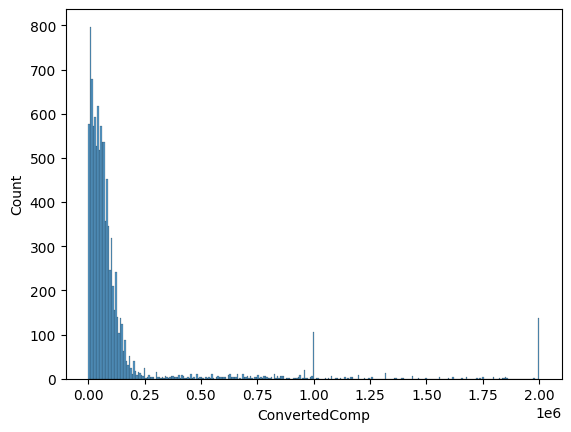

In [25]:
sns.histplot(df['ConvertedComp'])

Box plot of `Age.`


<Axes: ylabel='Age'>

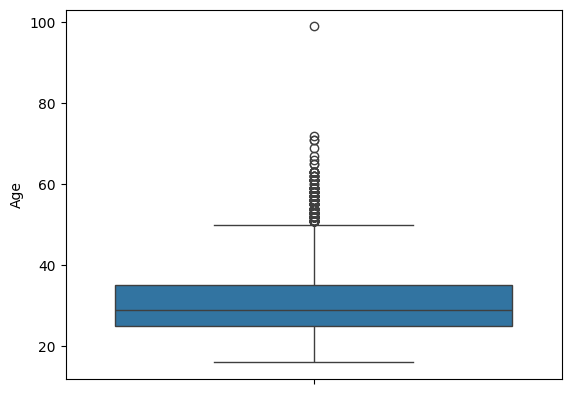

In [26]:
# your code goes here
sns.boxplot(df['Age'])


Scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

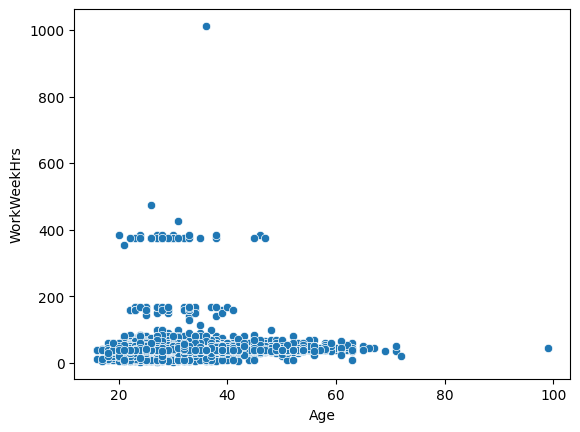

In [27]:
sns.scatterplot(df, x='Age', y='WorkWeekHrs')

### Pie Charts


Top 5 databases/languages that respondents wish to learn next year.

In [28]:
%sql select name from sqlite_master



 * sqlite:///m4_survey_data.sqlite
Done.


name
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear


In [29]:
df_database=pd.read_sql('select DatabaseDesireNextYear, count(*) as total from DatabaseDesireNextYear group by DatabaseDesireNextYear order by total desc limit 5', con)
df_database

,DatabaseDesireNextYear,total
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


Text(0.5, 1.0, 'Top 5 Database desire for next year')

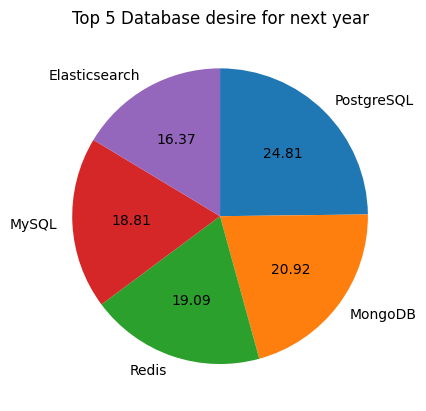

In [30]:
plt.pie(x=df_database['total'], labels=df_database['DatabaseDesireNextYear'],autopct='%.2f', startangle=90,counterclock=False)
plt.title('Top 5 Databases desire for next year')

Top 5 Languages that respondents wish to learn next year.

In [31]:
df_language=pd.read_sql('select LanguageDesireNextYear, count(*) as total from LanguageDesireNextYear group by LanguageDesireNextYear order by total desc limit 5', con)
df_language

,LanguageDesireNextYear,total
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


Text(0.5, 1.0, 'Top 5 Languages desire for next year')

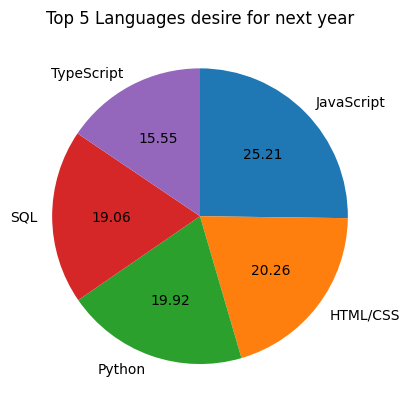

In [32]:
plt.pie(df_language['total'],labels=df_language['LanguageDesireNextYear'],autopct='%.2f', startangle=90,counterclock=False)
plt.title('Top 5 Languages desire for next year')

### Line Chart


Mean`ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'Mean of Convert Comp from 45 to 60 years')

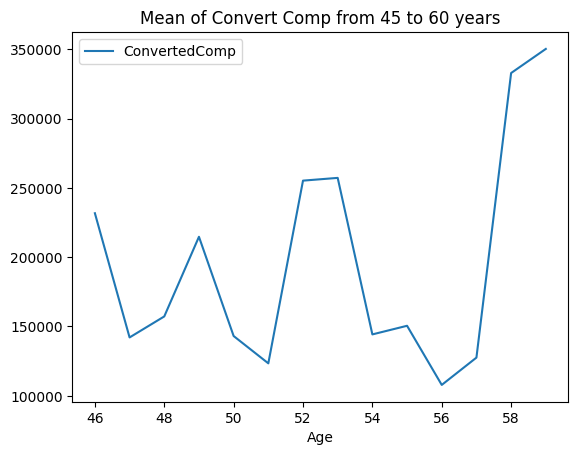

In [33]:
df[['Age','ConvertedComp']][(df['Age'] > 45) & (df['Age'] < 60)].groupby('Age').mean().plot(kind='line')
plt.title('Mean of Convert Comp from 45 to 60 years')

Text(0.5, 1.0, 'Mean of Convert Comp from 25 to 30 years')

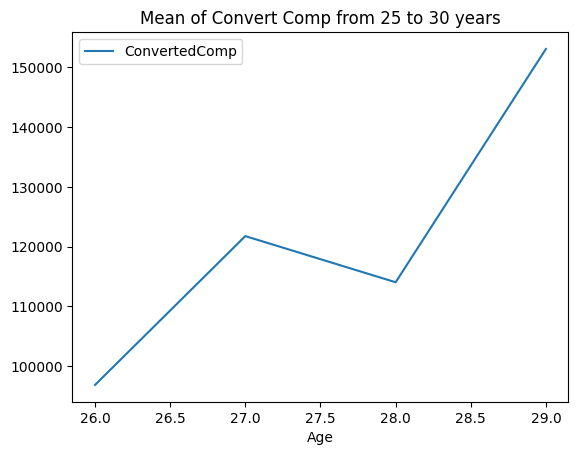

In [34]:
df[['Age','ConvertedComp']][(df['Age'] > 25) & (df['Age'] < 30)].groupby('Age').mean().plot(kind='line')
plt.title('Mean of Convert Comp from 25 to 30 years')

### Bar Chart


Horizontal bar chart using column `MainBranch.`


<Axes: xlabel='MainBranch', ylabel='count'>

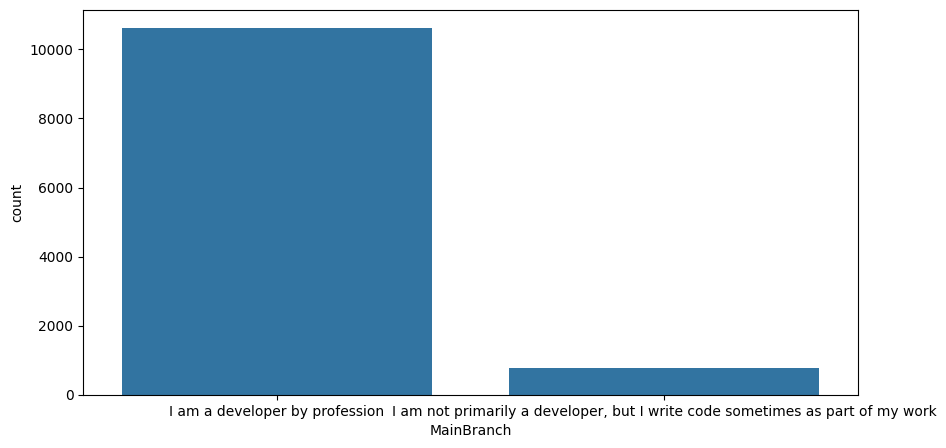

In [35]:
df['MainBranch']
# your code goes here
plt.figure(figsize=(10,5))
sns.countplot(df, x='MainBranch')


.
